In [5]:
#Setting Eco-System to get started
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [6]:
!git clone https://github.com/ehsanayaz/Object-Detection-Projects.git

fatal: destination path 'Object-Detection-Projects' already exists and is not an empty directory.


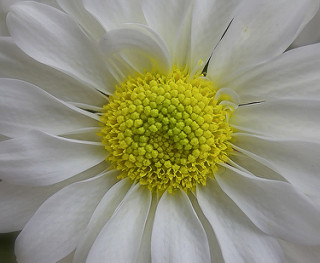

In [7]:
#Sample 
from google.colab.patches import cv2_imshow
img = '/content/Object-Detection-Projects/Flower Recognition/flowers/daisy/100080576_f52e8ee070_n.jpg'
img = cv2.imread(img)
cv2_imshow(img)

In [8]:
label = []
data = []

IMG_SIZE = 128

folder_dir = '/content/Object-Detection-Projects/Flower Recognition/flowers'

for folder in os.listdir(folder_dir):
  file_names = os.path.join(folder_dir, folder)
  for file_name in os.listdir(file_names):
    if file_name.endswith('jpg'):
        label.append(folder)
        img = cv2.imread(os.path.join(folder_dir, folder,file_name))
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        data.append(img)
    else: 
      continue


In [9]:
#Convert them into numerical values
data_arr = np.array(data)
label_arr = np.array(label)

In [10]:
#Preparing X and y: Encoding the label(target) and Normalizing the input images 
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

encoder = LabelEncoder() #Instantiate LabelEncoder
y = encoder.fit_transform(label_arr)
y  = to_categorical(y,5) # 5: Total number of target classes in out dataset 

X = data_arr/255

In [11]:
#Train_Test_Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 101)


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_generator = ImageDataGenerator(
    rotation_range = 25,
    width_shift_range=0.3,
    height_shift_range=0.3,
    zoom_range = 0.20,
    horizontal_flip=True,
    vertical_flip=True
    )

data_generator.fit(X_train)

new_data = data_generator.flow(X_train,y_train)

In [13]:
#Setting up my model (1)
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import Dropout 
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Activation 
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.optimizers import RMSprop

In [14]:
#Setting up my model (2)
model = Sequential()
model.add(Conv2D(filters= 64, kernel_size=(3,3), padding='same', activation='relu', input_shape =(IMG_SIZE,IMG_SIZE,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(5, activation = "softmax"))

model.compile(optimizer=Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
model.fit_generator(
    new_data,
    epochs = 64,
    validation_data = (X_test, y_test),
    verbose = 1
    )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/64
95/95 [==============================] - 45s 147ms/step - loss: 1.4708 - accuracy: 0.3391 - val_loss: 1.2695 - val_accuracy: 0.4719
Epoch 2/64
95/95 [==============================] - 13s 133ms/step - loss: 1.3392 - accuracy: 0.4217 - val_loss: 1.1642 - val_accuracy: 0.5382
Epoch 3/64
95/95 [==============================] - 13s 132ms/step - loss: 1.2716 - accuracy: 0.4399 - val_loss: 1.1568 - val_accuracy: 0.5482
Epoch 4/64
95/95 [==============================] - 13s 133ms/step - loss: 1.2041 - accuracy: 0.4947 - val_loss: 1.1351 - val_accuracy: 0.5520
Epoch 5/64
95/95 [==============================] - 13s 132ms/step - loss: 1.1958 - accuracy: 0.5056 - val_loss: 1.0133 - val_accuracy: 0.6145
Epoch 6/64
95/95 [==============================] - 13s 133ms/step - loss: 1.1620 - accuracy: 0.5261 - val_loss: 1.0088 - val_accuracy: 0.6237
Epoch 7/64
95/95 [==============================] - 13s 133ms/step - loss: 1.1030 - accuracy: 0.5638 - val_loss: 1.0672 - val_accuracy: 0.5960

In [15]:
label= os.listdir(folder_dir)
label = np.sort(label)
label

array(['daisy', 'dandelion', 'flowers', 'rose', 'sunflower', 'tulip'],
      dtype='<U9')

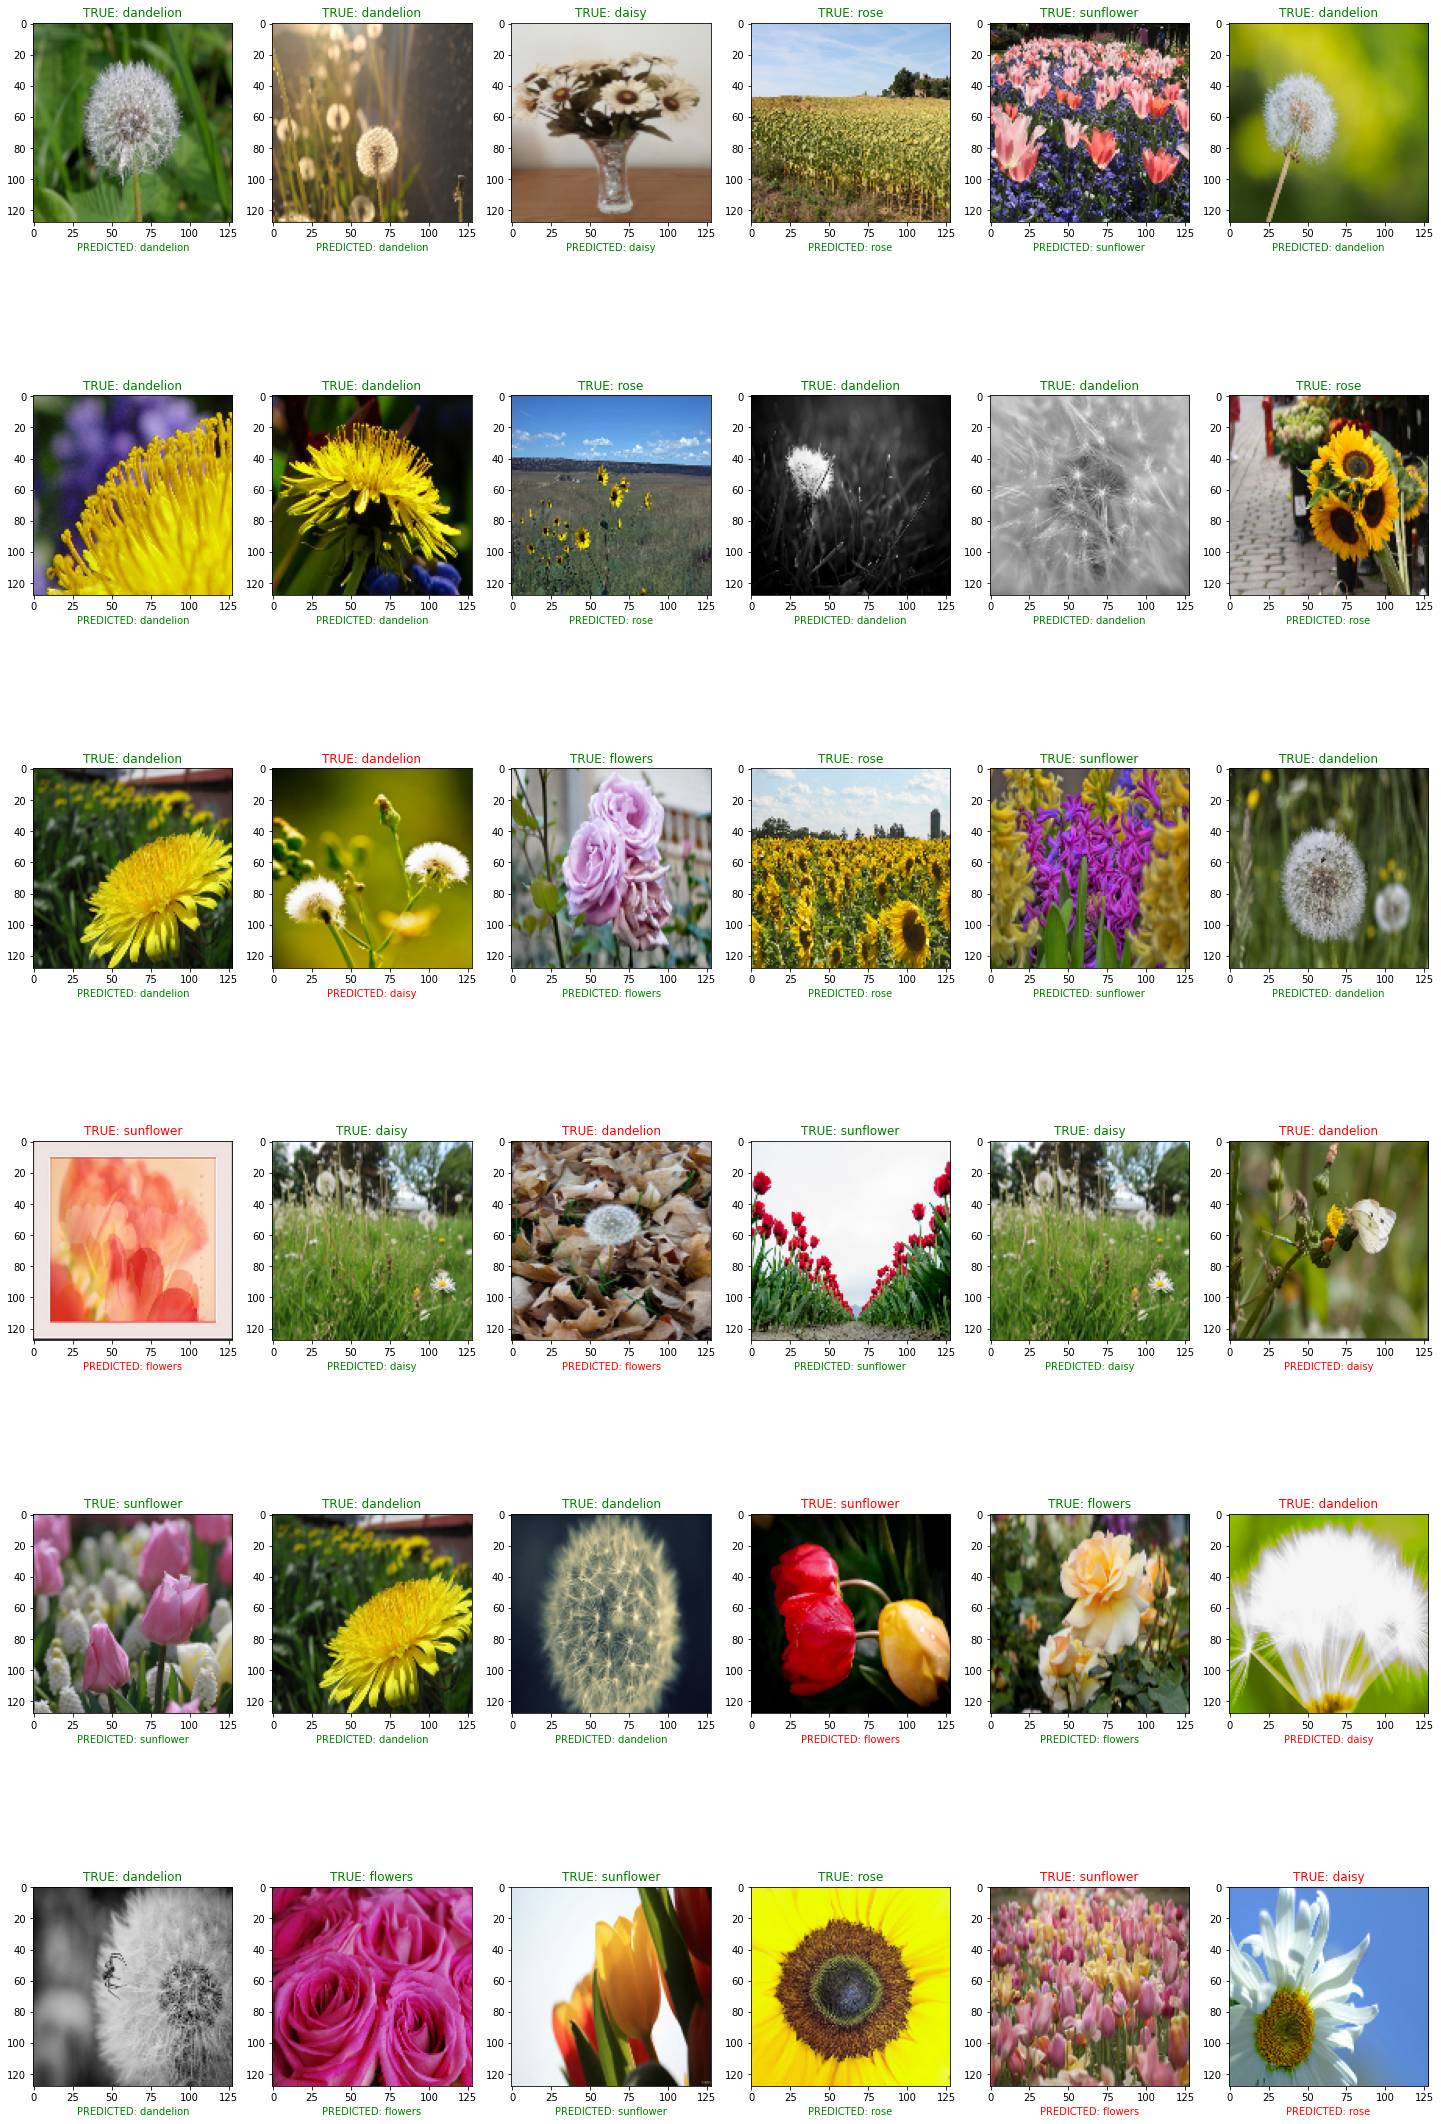

In [23]:
fig, ax = plt.subplots(6,6, figsize=(25, 40))

for i in range(6):
    for j in range(6):
        k = int(np.random.random_sample() * len(X_test))
        if(label[np.argmax(y_test[k])] == label[np.argmax(model.predict(X_test)[k])]):
            ax[i,j].set_title("TRUE: " + label[np.argmax(y_test[k])], color='green')
            ax[i,j].set_xlabel("PREDICTED: " + label[np.argmax(model.predict(X_test)[k])], color='green')
            ax[i,j].imshow(np.array(X_test)[k].reshape(128, 128, 3), cmap='gray')
        else:
            ax[i,j].set_title("TRUE: " + label[np.argmax(y_test[k])], color='red')
            ax[i,j].set_xlabel("PREDICTED: " + label[np.argmax(model.predict(X_test)[k])], color='red')
            ax[i,j].imshow(np.array(X_test)[k].reshape(128, 128, 3), cmap='gray')